In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
empty_ch = np.fromfile(open("empty_channel"), dtype=np.complex64)

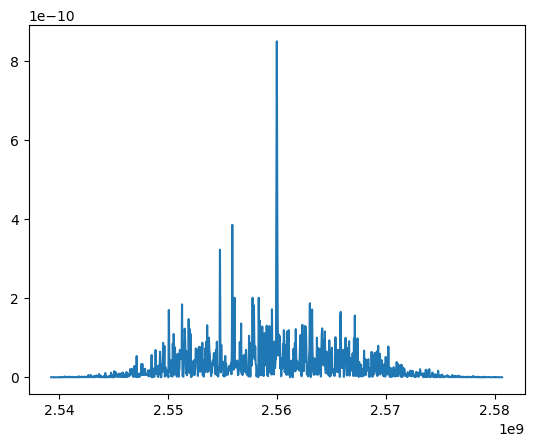

In [7]:
samp_rate=41.44*1e6
fc=2.56*1e9
n=1024
x=file[0:0+n] ##first n samples
PSD = np.abs(np.fft.fft(x))**2 / (n*samp_rate)
PSD_shifted = np.fft.fftshift(PSD)
f = np.arange(samp_rate/-2.0, samp_rate/2.0, samp_rate/n) # start, stop, step.  centered around 0 Hz
f += fc 
plt.plot(f, PSD_shifted)
plt.show()


In [23]:
wat_size=50
num_waterfall_train=2000
num_waterfall_val=800
num_waterfall_test=200
n=1024
index=0
lower=0
upper=lower+n
label="0"
for i in range(num_waterfall_train):
    mat=np.zeros((wat_size,n))
    for j in range(wat_size):
        x=empty_ch[lower:upper]
        PSD = np.abs(np.fft.fft(x))**2 / (n*samp_rate)
        PSD_shifted = np.fft.fftshift(PSD)
        for p in range(n):
            mat[j:]=PSD_shifted
        lower+=n
        upper+=n
    np.save("matrixes/clean/"+label+str(index),mat)
    index+=1
index=0
for i in range(num_waterfall_val):
    mat=np.zeros((wat_size,n))
    for j in range(wat_size):
        x=empty_ch[lower:upper]
        PSD = np.abs(np.fft.fft(x))**2 / (n*samp_rate)
        PSD_shifted = np.fft.fftshift(PSD)
        for p in range(n):
            mat[j:]=PSD_shifted
        lower+=n
        upper+=n
    np.save("matrixes/clean_validation/"+label+str(index),mat)
    index+=1
index=0
for i in range(num_waterfall_test):
    mat=np.zeros((wat_size,n))
    for j in range(wat_size):
        x=empty_ch[lower:upper]
        PSD = np.abs(np.fft.fft(x))**2 / (n*samp_rate)
        PSD_shifted = np.fft.fftshift(PSD)
        for p in range(n):
            mat[j:]=PSD_shifted
        lower+=n
        upper+=n
    np.save("matrixes/test/"+label+str(index),mat)
    index+=1

2000
